### Programming and critical analysis

Recall the `pd_speech.arff` dataset from earlier homeworks, centered on the Parkinson diagnosis from 
speech features. For the following exercises, normalize the data using `sklearn`’s `MinMaxScaler`.

Using `sklearn`, apply k-means clustering fully unsupervisedly (without targets) on the normalized data with k = 3 and three different seeds (using `random` ε {0,1,2}). Assess the silhouette and purity of the produced solutions.

In [1]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score, cluster
from sklearn.cluster import KMeans

# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff("pd_speech.arff")
df = pd.DataFrame(data[0])
X = df.drop("class", axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
truth = np.array(LabelEncoder().fit_transform(df["class"]))

for i in range(0, 3):
    # Create the classifier and fit it to the data
    kmeans = KMeans(n_clusters=3, init="random", random_state=i)
    kmeans.fit(X)
    # Determine the silhouette score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)

    # Determine the purity score: sum of the largest value in each column divided by the total number of samples
    purity_score = (cluster.contingency_matrix(truth, kmeans.labels_).max(axis=0).sum()/truth.shape[0])
    print("Silhouette score for iteration", i, "is", sil_score)
    print("Purity score for iteration", i, "is", purity_score)

Silhouette score for iteration 0 is 0.07483690902300218
Purity score for iteration 0 is 0.746031746031746
Silhouette score for iteration 1 is 0.07177218182927182
Purity score for iteration 1 is 0.75
Silhouette score for iteration 2 is 0.07177218182927182
Purity score for iteration 2 is 0.75


Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original Parkinson diagnoses, and ii) the previously learned k = 3 clusters (`random` = 0). To this end, select the two most informative features as axis and color observations according to their label. For feature selection, select the two input variables with highest variance on the MinMax normalized data.

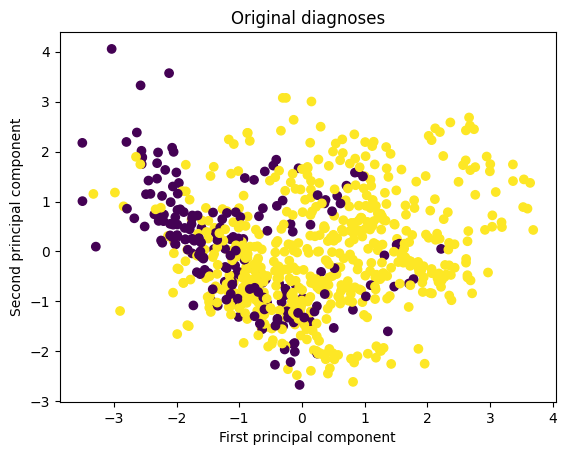

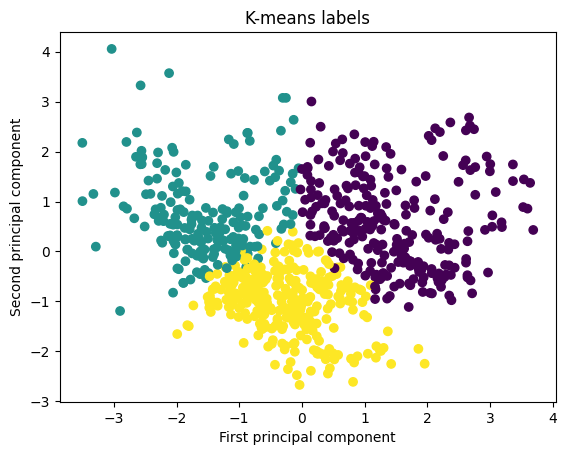

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Determine the two most informative features
pca = PCA(n_components=2, svd_solver="full")
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Use KMeans to cluster the data
kmeans = KMeans(n_clusters=3, init="random", random_state=0).fit(X_scaled)
klabels = kmeans.labels_

# Plot the original diagnoses
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=truth, cmap="viridis")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Original diagnoses")
plt.show()

# Plot the k-means labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=klabels, cmap="viridis")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("K-means labels")
plt.show()

The fraction of variance explained by a principal component is the ratio between the variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues). How many principal components are necessary to explain more than 80% of variability?

The number of components needed to account for 80% of the variance is 31


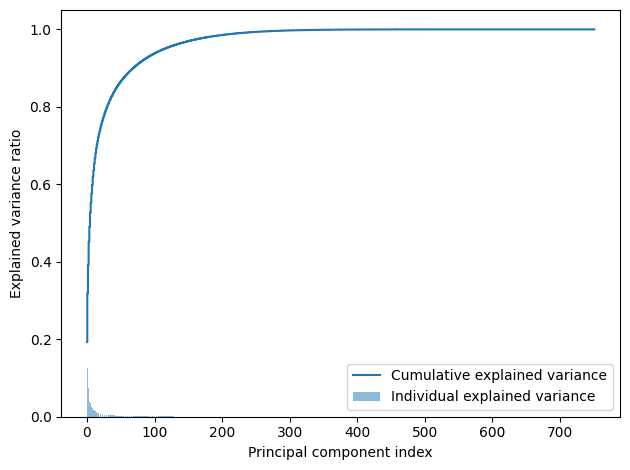

In [3]:
# Determine the features which account for 80% of the variance
pca = PCA(svd_solver="full")
pca.fit(X_scaled)
exp_var_pca = pca.explained_variance_ratio_
cs_eigenvalues = np.cumsum(exp_var_pca)

for i in range(cs_eigenvalues.size):
    if cs_eigenvalues[i] >= 0.8:
        print("The number of components needed to account for 80% of the variance is",i + 1,)
        break

# Plot the cumulative sum of the eigenvalues
plt.bar(range(0, len(exp_var_pca)),exp_var_pca,alpha=0.5,align="center",label="Individual explained variance")
plt.step(range(0, len(cs_eigenvalues)),cs_eigenvalues,where="mid",label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()